In [ ]:
#Installing packages
!pip install "pydantic<2"
!pip install "importlib_metadata<7.0,>=6.0"
!python -m venv myenv
!source myenv/bin/activate
!pip install pycaret
!pip install ucimlrepo
!pip install --upgrade pycaret
!pip install catboost
!pip install mlflow
!pip install pycaret[tuners]
!pip install pycaret[analysis]
!pip install gradio
!pip install pycaret[mlops]
!pip install cohere openai tiktoken

#Unzip the dataset
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

#Import functions
from pycaret.classification import *
import pandas as pd

#Loading the dataset
df = pd.read_csv('winequality-red.csv', sep=';')

#Checking the data frame
df.head()

In [2]:
# Initialize the setup
s = setup(df, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [3]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6702,0.5871,0.6702,0.6485,0.6494,0.4612,0.4667,0.2680
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.5850
rf,Random Forest Classifier,0.6595,0.5761,0.6595,0.6323,0.6388,0.4444,0.4500,0.6030
lightgbm,Light Gradient Boosting Machine,0.6497,0.5725,0.6497,0.6277,0.6342,0.4365,0.4403,2.2620
catboost,CatBoost Classifier,0.6425,0.5719,0.6425,0.6191,0.6241,0.4232,0.4282,8.7830
gbc,Gradient Boosting Classifier,0.6336,0.5463,0.6336,0.6173,0.6219,0.4151,0.4173,1.7400
lr,Logistic Regression,0.6032,0.5297,0.6032,0.5717,0.5746,0.3422,0.3483,1.4870
lda,Linear Discriminant Analysis,0.5987,0.5329,0.5987,0.5806,0.5845,0.3558,0.3586,0.0390
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.4973,0.5318,0.2989,0.3103,0.0320
dt,Decision Tree Classifier,0.5872,0.4659,0.5872,0.5837,0.5821,0.3556,0.3572,0.0620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

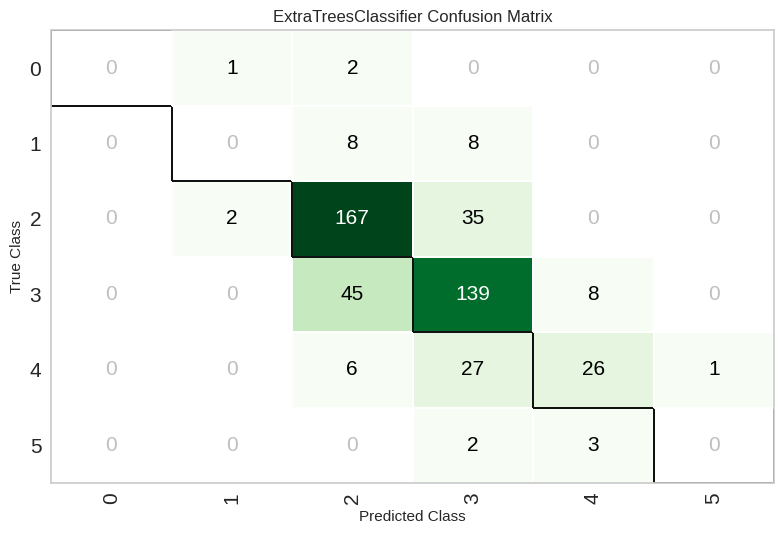

In [4]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

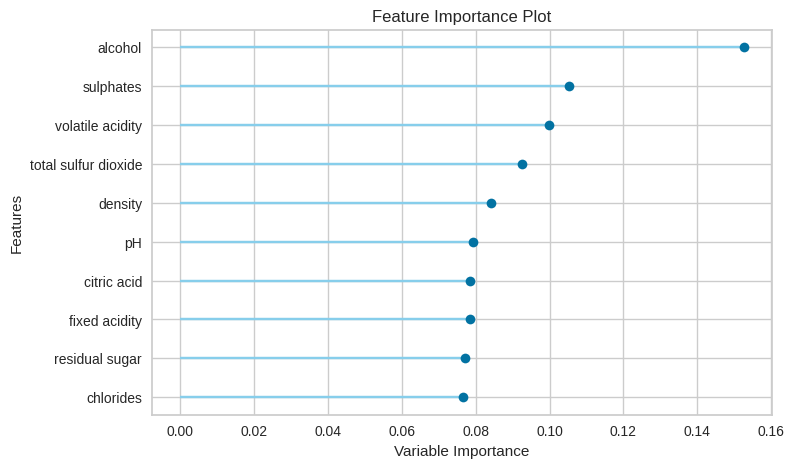

In [5]:
# plot feature importance
plot_model(best, plot = 'feature')

In [7]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6917,0.8583,0.6917,0.6626,0.6715,0.4965,0.5002


In [9]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
748,7.2,0.500,0.18,2.1,0.071,12.0,31.0,0.99761,3.52,0.72,9.6,6,6,0.72
1041,6.9,0.490,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6,5,0.58
680,13.3,0.430,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,5,6,0.65
217,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,9.1,5,5,0.70
1489,6.2,0.570,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,6,6,0.53


In [10]:
# Copy data and drop 'quality' variable
new_data = df.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.00
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.00
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.00
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.44
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.00


In [12]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

In [13]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [14]:
s = setup(df, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [15]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [16]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
507,11.2,0.67,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5
1577,6.2,0.70,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9
886,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4
398,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0
607,8.8,0.48,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5
...,...,...,...,...,...,...,...,...,...,...,...
755,7.8,0.91,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7
1149,10.0,0.35,0.47,2.0,0.061,6.0,11.0,0.99585,3.23,0.52,12.0
117,7.8,0.56,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4
941,9.9,0.27,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [17]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [18]:
# init setup with normalize = True

s = setup(df, target = 'quality', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


<AxesSubplot: >

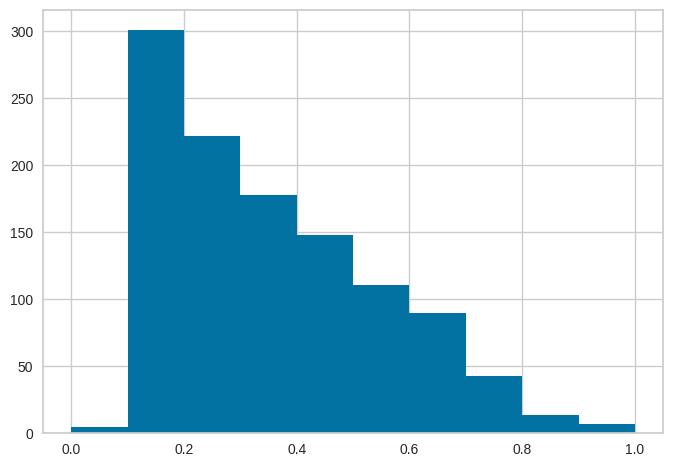

In [19]:
# Let's check the X_train_transformed to see the effect of parameters passed
get_config('X_train_transformed')['alcohol'].hist()

<AxesSubplot: >

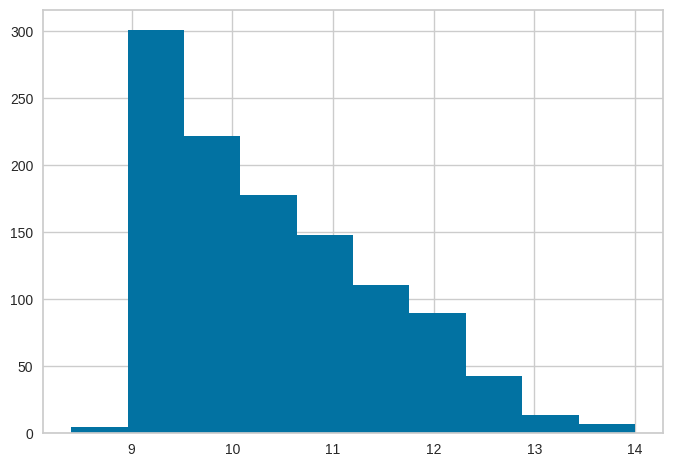

In [20]:
get_config('X_train')['alcohol'].hist()

In [21]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6711,0.5870,0.6711,0.6519,0.6511,0.4630,0.4685,0.4850
rf,Random Forest Classifier,0.6622,0.5761,0.6622,0.6339,0.6413,0.4490,0.4546,0.5330
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.4110
lightgbm,Light Gradient Boosting Machine,0.6560,0.5701,0.6560,0.6351,0.6408,0.4457,0.4489,3.5640
catboost,CatBoost Classifier,0.6425,0.5717,0.6425,0.6191,0.6241,0.4232,0.4282,8.6640
gbc,Gradient Boosting Classifier,0.6319,0.5461,0.6319,0.6166,0.6208,0.4129,0.4150,2.0100
lda,Linear Discriminant Analysis,0.5987,0.5329,0.5987,0.5806,0.5845,0.3558,0.3586,0.0400
lr,Logistic Regression,0.5916,0.5292,0.5916,0.5499,0.5528,0.3150,0.3234,0.0740
dt,Decision Tree Classifier,0.5881,0.4669,0.5881,0.5853,0.5833,0.3578,0.3594,0.0460
ridge,Ridge Classifier,0.5862,0.0000,0.5862,0.4830,0.5281,0.2949,0.3071,0.0400


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [22]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [23]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6711,0.5870,0.6711,0.6519,0.6511,0.4630,0.4685,0.2570
rf,Random Forest Classifier,0.6622,0.5761,0.6622,0.6339,0.6413,0.4490,0.4546,0.4080
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.5400
lightgbm,Light Gradient Boosting Machine,0.6560,0.5701,0.6560,0.6351,0.6408,0.4457,0.4489,3.2540
gbc,Gradient Boosting Classifier,0.6319,0.5461,0.6319,0.6166,0.6208,0.4129,0.4150,1.6640
dt,Decision Tree Classifier,0.5881,0.4669,0.5881,0.5853,0.5833,0.3578,0.3594,0.0510


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [24]:
compare_tree_models

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [25]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6711,0.5870,0.6711,0.6519,0.6511,0.4630,0.4685,0.257
rf,Random Forest Classifier,0.6622,0.5761,0.6622,0.6339,0.6413,0.4490,0.4546,0.408
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.540
lightgbm,Light Gradient Boosting Machine,0.6560,0.5701,0.6560,0.6351,0.6408,0.4457,0.4489,3.254
gbc,Gradient Boosting Classifier,0.6319,0.5461,0.6319,0.6166,0.6208,0.4129,0.4150,1.664
dt,Decision Tree Classifier,0.5881,0.4669,0.5881,0.5853,0.5833,0.3578,0.3594,0.051


In [26]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6711,0.5870,0.6711,0.6519,0.6511,0.4630,0.4685,0.4780
rf,Random Forest Classifier,0.6622,0.5761,0.6622,0.6339,0.6413,0.4490,0.4546,0.4560
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.4450
lightgbm,Light Gradient Boosting Machine,0.6560,0.5701,0.6560,0.6351,0.6408,0.4457,0.4489,2.1370
catboost,CatBoost Classifier,0.6425,0.5717,0.6425,0.6191,0.6241,0.4232,0.4282,7.5880
gbc,Gradient Boosting Classifier,0.6319,0.5461,0.6319,0.6166,0.6208,0.4129,0.4150,1.7310
lda,Linear Discriminant Analysis,0.5987,0.5329,0.5987,0.5806,0.5845,0.3558,0.3586,0.0420
lr,Logistic Regression,0.5916,0.5292,0.5916,0.5499,0.5528,0.3150,0.3234,0.0720
dt,Decision Tree Classifier,0.5881,0.4669,0.5881,0.5853,0.5833,0.3578,0.3594,0.0520
ridge,Ridge Classifier,0.5862,0.0000,0.5862,0.4830,0.5281,0.2949,0.3071,0.0650


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [27]:
# list of top 3 models by Recall
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 XGBC

In [28]:
from pycaret.classification import *
s = setup(df, target='quality', log_experiment='mlflow', experiment_name='wine_quality_experiment')

,Description,Value
0,Session id,2196
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


2023/12/03 21:37:50 INFO mlflow.tracking.fluent: Experiment with name 'wine_quality_experiment' does not exist. Creating a new experiment.


In [29]:
#compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6694,0.5739,0.6694,0.6466,0.6530,0.4671,0.4711,7.6300
et,Extra Trees Classifier,0.6649,0.5860,0.6649,0.6399,0.6465,0.4561,0.4604,0.4280
rf,Random Forest Classifier,0.6631,0.5808,0.6631,0.6366,0.6433,0.4525,0.4574,0.3470
lightgbm,Light Gradient Boosting Machine,0.6551,0.5694,0.6551,0.6303,0.6385,0.4450,0.4480,3.1410
xgboost,Extreme Gradient Boosting,0.6319,0.5631,0.6319,0.6127,0.6178,0.4092,0.4120,0.3250
gbc,Gradient Boosting Classifier,0.6318,0.5582,0.6318,0.6193,0.6204,0.4125,0.4151,1.5510
lr,Logistic Regression,0.5988,0.5293,0.5988,0.5583,0.5698,0.3354,0.3409,0.5190
ridge,Ridge Classifier,0.5863,0.0000,0.5863,0.4955,0.5293,0.2955,0.3077,0.0320
lda,Linear Discriminant Analysis,0.5863,0.5318,0.5863,0.5625,0.5708,0.3364,0.3389,0.0350
dt,Decision Tree Classifier,0.5738,0.4726,0.5738,0.5750,0.5716,0.3329,0.3345,0.0420


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [30]:
# start mlflow server on localhost:5000
!mlflow ui

Traceback (most recent call last):
  File "/usr/local/bin/mlflow", line 8, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/mlflow/cli.py", line 312, in ui
    from mlflow.server import _run_server
  File "/usr/local/lib/python3.10/dist-packages/mlflow/server/__init__.py", line 6, in <module>
    from flask import Flask, send_fro

In [31]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [32]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.0000,0.6250,0.5647,0.5912,0.3779,0.3824
1,0.5536,0.0000,0.5536,0.5014,0.5153,0.2528,0.2607
2,0.6696,0.8130,0.6696,0.6288,0.6429,0.4537,0.4592
3,0.6518,0.7732,0.6518,0.6330,0.6310,0.4263,0.4319
4,0.5982,0.7687,0.5982,0.5622,0.5713,0.3363,0.3413
5,0.5446,0.7260,0.5446,0.5094,0.5169,0.2448,0.2490
6,0.5804,0.7407,0.5804,0.5483,0.5585,0.3121,0.3157
7,0.5625,0.7475,0.5625,0.5192,0.5331,0.2784,0.2827
8,0.5804,0.7234,0.5804,0.5202,0.5407,0.3002,0.3066


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.0000,0.6250,0.5647,0.5912,0.3779,0.3824
1,0.5536,0.0000,0.5536,0.5014,0.5153,0.2528,0.2607
2,0.6696,0.8130,0.6696,0.6288,0.6429,0.4537,0.4592
3,0.6518,0.7732,0.6518,0.6330,0.6310,0.4263,0.4319
4,0.5982,0.7687,0.5982,0.5622,0.5713,0.3363,0.3413
5,0.5446,0.7260,0.5446,0.5094,0.5169,0.2448,0.2490
6,0.5804,0.7407,0.5804,0.5483,0.5585,0.3121,0.3157
7,0.5625,0.7475,0.5625,0.5192,0.5331,0.2784,0.2827
8,0.5804,0.7234,0.5804,0.5202,0.5407,0.3002,0.3066


In [34]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6354,0.7667,0.6354,0.5983,0.6054,0.3939,0.4001
1,0.6113,0.7635,0.6113,0.5812,0.5861,0.3555,0.3603
2,0.5898,0.7512,0.5898,0.5564,0.5604,0.3188,0.3242
Mean,0.6122,0.7605,0.6122,0.5786,0.5840,0.3560,0.3616
Std,0.0186,0.0067,0.0186,0.0172,0.0184,0.0307,0.0310


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6518,0.0000,0.6518,0.6115,0.6273,0.4282,0.4329
1,0.5714,0.0000,0.5714,0.5318,0.5321,0.2767,0.2862
2,0.6607,0.8191,0.6607,0.6231,0.6306,0.4340,0.4410
3,0.6429,0.7721,0.6429,0.6257,0.6195,0.4093,0.4158
4,0.5893,0.7646,0.5893,0.5566,0.5579,0.3158,0.3222
5,0.5446,0.7253,0.5446,0.5094,0.5169,0.2448,0.2490
6,0.5625,0.7411,0.5625,0.5284,0.5385,0.2800,0.2840
7,0.5714,0.7319,0.5714,0.5326,0.5451,0.2960,0.3001
8,0.5714,0.7230,0.5714,0.5264,0.5418,0.2949,0.2988


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2196, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2196, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5536,0.0000,0.5536,0.5563,0.5532,0.3022,0.3032
1,0.5179,0.0000,0.5179,0.5137,0.5124,0.2424,0.2445
2,0.5804,0.6885,0.5804,0.5848,0.5805,0.3541,0.3554
3,0.5804,0.6799,0.5804,0.5749,0.5756,0.3422,0.3435
4,0.5714,0.6695,0.5714,0.5611,0.5652,0.3241,0.3247
5,0.5268,0.6300,0.5268,0.5445,0.5283,0.2553,0.2591
6,0.6518,0.7227,0.6518,0.6382,0.6416,0.4478,0.4497
7,0.5625,0.6621,0.5625,0.5625,0.5613,0.3194,0.3203
8,0.5893,0.6733,0.5893,0.5846,0.5830,0.3471,0.3485


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5804,0.0000,0.5804,0.4899,0.5294,0.2839,0.2958
1,0.5536,0.0000,0.5536,0.4586,0.5016,0.2357,0.2441
2,0.6339,0.7442,0.6339,0.5270,0.5755,0.3738,0.3863
3,0.5804,0.7003,0.5804,0.4873,0.5275,0.2898,0.3028
4,0.5446,0.6720,0.5446,0.4441,0.4885,0.2243,0.2338
5,0.5446,0.6681,0.5446,0.4432,0.4865,0.2231,0.2340
6,0.5446,0.6580,0.5446,0.4570,0.4954,0.2289,0.2386
7,0.5625,0.7100,0.5625,0.4718,0.5104,0.2590,0.2712
8,0.5536,0.6918,0.5536,0.4538,0.4922,0.2395,0.2556


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5804,0.0000,0.5804,0.5729,0.5755,0.3307,0.3313
1,0.5714,0.0000,0.5714,0.5453,0.5562,0.3066,0.3086
2,0.5982,0.7245,0.5982,0.5624,0.5725,0.3518,0.3589
3,0.5893,0.6934,0.5893,0.5919,0.5870,0.3578,0.3596
4,0.6250,0.7196,0.6250,0.5906,0.5977,0.3836,0.3894
5,0.5089,0.6436,0.5089,0.4888,0.4954,0.2025,0.2046
6,0.6339,0.7732,0.6339,0.6065,0.6102,0.3985,0.4058
7,0.5268,0.6732,0.5268,0.5169,0.5213,0.2531,0.2535
8,0.5714,0.6914,0.5714,0.5405,0.5523,0.3041,0.3064


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [40]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5804,0.0000,0.5804,0.4899,0.5294,0.2839,0.2958
1,0.5536,0.0000,0.5536,0.4586,0.5016,0.2357,0.2441
2,0.6339,0.7442,0.6339,0.5270,0.5755,0.3738,0.3863
3,0.5804,0.7003,0.5804,0.4873,0.5275,0.2898,0.3028
4,0.5446,0.6720,0.5446,0.4441,0.4885,0.2243,0.2338
5,0.5446,0.6681,0.5446,0.4432,0.4865,0.2231,0.2340
6,0.5446,0.6580,0.5446,0.4570,0.4954,0.2289,0.2386
7,0.5625,0.7100,0.5625,0.4718,0.5104,0.2590,0.2712
8,0.5536,0.6918,0.5536,0.4538,0.4922,0.2395,0.2556


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=2196, splitter='best')

In [42]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'aci...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=2196, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [43]:
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6339,0.0000,0.6339,0.6307,0.6260,0.4094,0.4124
1,0.5089,0.0000,0.5089,0.5119,0.5054,0.2123,0.2137
2,0.6161,0.7611,0.6161,0.5941,0.6045,0.3909,0.3916
3,0.5893,0.7252,0.5893,0.5705,0.5791,0.3542,0.3549
4,0.5714,0.7305,0.5714,0.5594,0.5645,0.3241,0.3247
5,0.5089,0.6698,0.5089,0.4999,0.5037,0.2245,0.2247
6,0.6161,0.7546,0.6161,0.5838,0.5990,0.3830,0.3844
7,0.5446,0.6792,0.5446,0.5193,0.5299,0.2830,0.2844
8,0.5268,0.7422,0.5268,0.5060,0.5159,0.2490,0.2494


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-12-03 21:42:09,858] Searching the best hyperparameters using 1119 samples...
[I 2023-12-03 21:42:12,475] Finished hyperparameter search!


In [44]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.0000,0.6250,0.6189,0.6213,0.4132,0.4137
1,0.6339,0.0000,0.6339,0.6047,0.6130,0.4007,0.4072
2,0.6429,0.8457,0.6429,0.6185,0.6140,0.4246,0.4409
3,0.6071,0.7853,0.6071,0.5833,0.5926,0.3723,0.3746
4,0.6607,0.7779,0.6607,0.6563,0.6401,0.4440,0.4506
5,0.5179,0.7344,0.5179,0.5124,0.5135,0.2430,0.2431
6,0.7054,0.8099,0.7054,0.6868,0.6848,0.5175,0.5234
7,0.5714,0.7262,0.5714,0.5544,0.5617,0.3245,0.3255
8,0.6071,0.7504,0.6071,0.5830,0.5862,0.3581,0.3635


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=2196,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=2196, verbose=0,
                  warm_start=False)

In [45]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5625,0.0000,0.5625,0.5747,0.5669,0.3263,0.3273
1,0.5179,0.0000,0.5179,0.5143,0.5156,0.2431,0.2434
2,0.5893,0.6864,0.5893,0.5727,0.5793,0.3539,0.3551
3,0.5804,0.6956,0.5804,0.6100,0.5943,0.3629,0.3638
4,0.5357,0.6432,0.5357,0.5259,0.5305,0.2722,0.2724
5,0.5089,0.6353,0.5089,0.5421,0.5210,0.2628,0.2649
6,0.6429,0.7154,0.6429,0.6265,0.6314,0.4320,0.4346
7,0.5893,0.6818,0.5893,0.5818,0.5842,0.3550,0.3562
8,0.5982,0.6806,0.5982,0.5894,0.5891,0.3607,0.3633


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=2196,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=2196)

In [46]:
# top 3 models based on recall
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 XGBC

In [47]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7054,0.0000,0.7054,0.6838,0.6939,0.5305,0.5319
1,0.5625,0.0000,0.5625,0.5270,0.5368,0.2803,0.2865
2,0.6786,0.8749,0.6786,0.6433,0.6574,0.4847,0.4889
3,0.6250,0.8092,0.6250,0.6014,0.6113,0.4019,0.4044
4,0.6518,0.8460,0.6518,0.6280,0.6281,0.4297,0.4348
5,0.6518,0.8255,0.6518,0.6188,0.6341,0.4407,0.4426
6,0.6964,0.8562,0.6964,0.6801,0.6814,0.5067,0.5104
7,0.6071,0.8119,0.6071,0.5778,0.5892,0.3640,0.3663
8,0.6786,0.8247,0.6786,0.6623,0.6589,0.4739,0.4797


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   ra...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [48]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7321,0.0000,0.7321,0.7194,0.7228,0.5753,0.5786
1,0.5893,0.0000,0.5893,0.5612,0.5675,0.3199,0.3243
2,0.6696,0.8818,0.6696,0.6294,0.6463,0.4674,0.4713
3,0.6786,0.8237,0.6786,0.6581,0.6591,0.4768,0.4857
4,0.6696,0.8522,0.6696,0.6323,0.6428,0.4585,0.4637
5,0.5982,0.8288,0.5982,0.5698,0.5802,0.3472,0.3503
6,0.7500,0.8540,0.7500,0.7170,0.7307,0.5991,0.6035
7,0.6429,0.8253,0.6429,0.6108,0.6243,0.4211,0.4235
8,0.6964,0.8366,0.6964,0.6639,0.6696,0.5003,0.5075


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=F...
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=2196,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

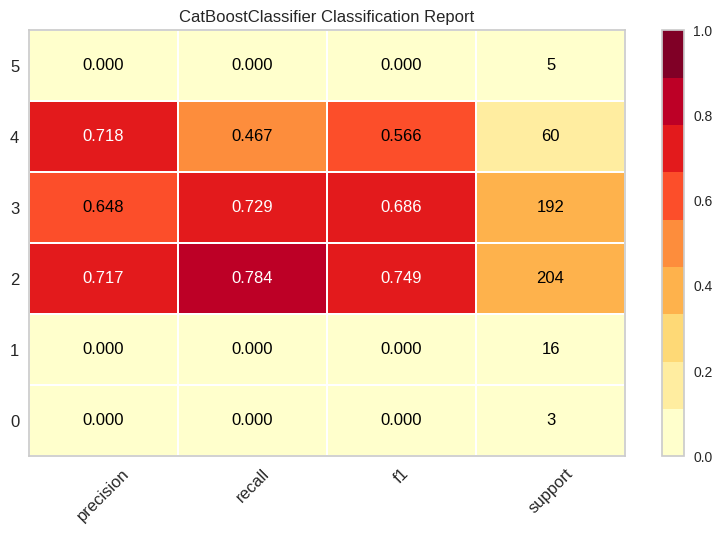

In [49]:
# plot class report
plot_model(best, plot = 'class_report')

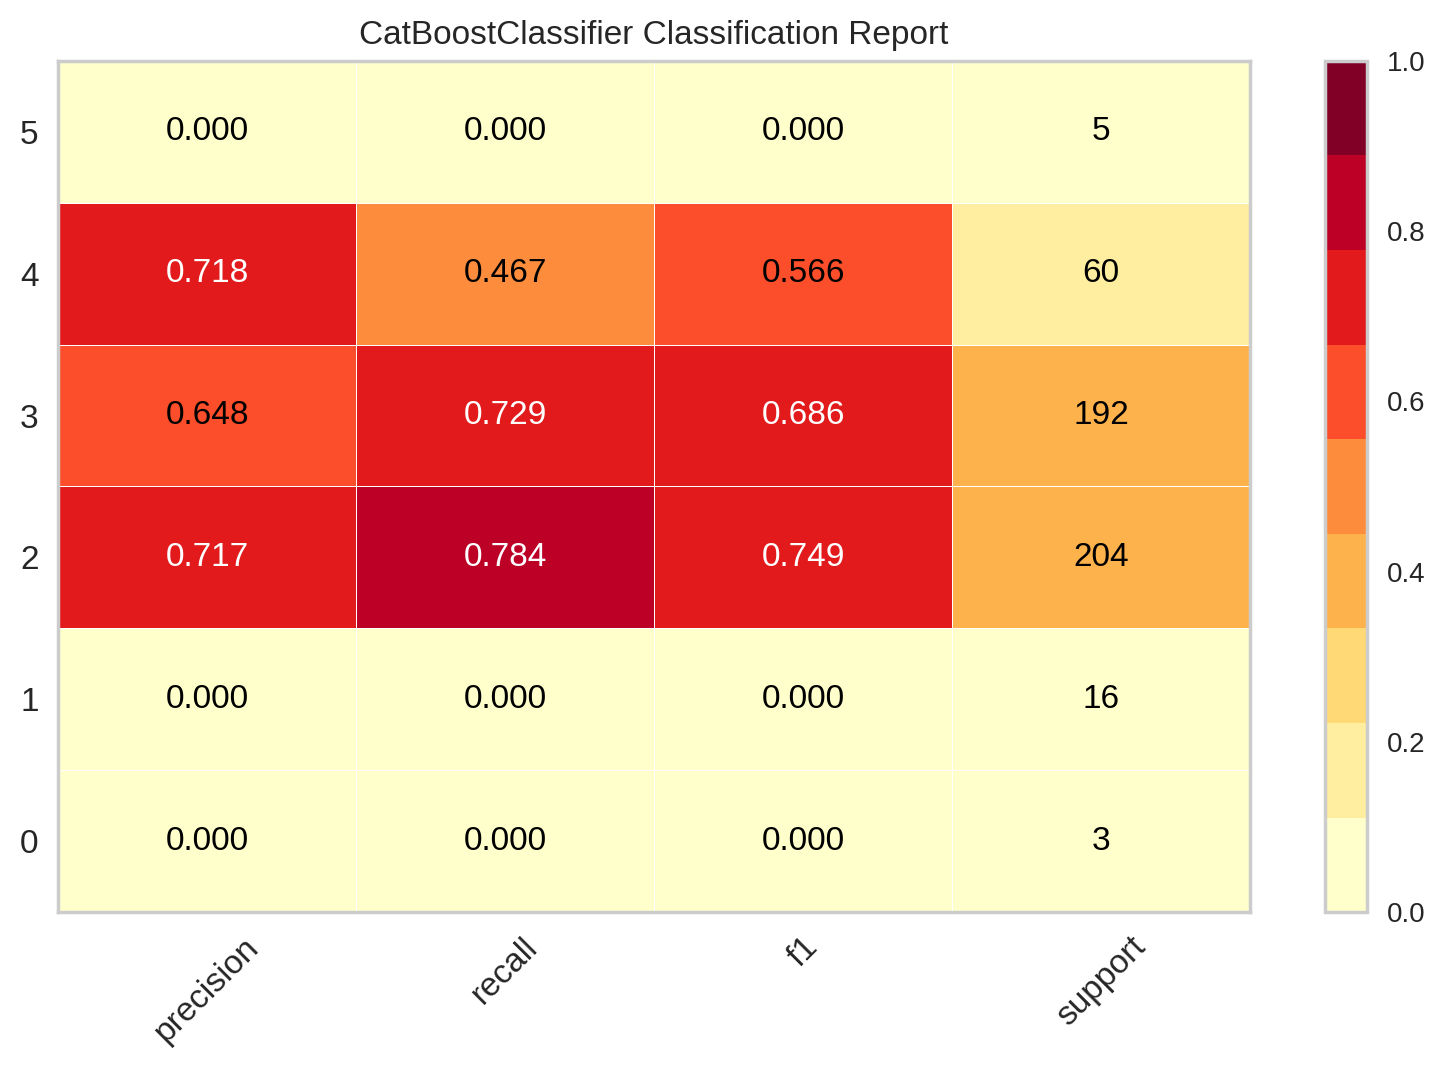

In [50]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [51]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [52]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.7018,0.7068,0.5475,0.5491
1,0.5714,0.0000,0.5714,0.5361,0.5467,0.2952,0.3009
2,0.7143,0.8758,0.7143,0.6738,0.6908,0.5394,0.5439
3,0.5625,0.7774,0.5625,0.5378,0.5494,0.3083,0.3091
4,0.6786,0.8346,0.6786,0.6406,0.6513,0.4734,0.4788
5,0.6429,0.7873,0.6429,0.6144,0.6280,0.4354,0.4363
6,0.7054,0.8448,0.7054,0.6953,0.6936,0.5243,0.5294
7,0.6161,0.7632,0.6161,0.6070,0.6051,0.3812,0.3829
8,0.6607,0.8109,0.6607,0.6333,0.6438,0.4534,0.4553


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

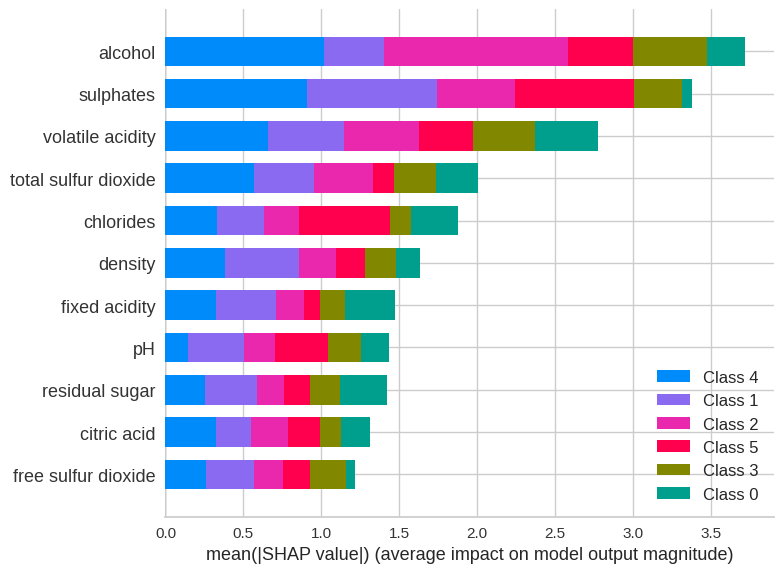

In [53]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [54]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [55]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/35 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5988,0.5293,0.5988,0.5583,0.5698,0.3354,0.3409
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.4870,0.4558,0.4870,0.4619,0.4662,0.1610,0.1644
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.5461,0.5126,0.5461,0.5630,0.5491,0.3132,0.3160
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5738,0.4726,0.5738,0.5750,0.5716,0.3329,0.3345
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.3941,0.0000,0.3941,0.3277,0.2978,0.0678,0.0916
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5863,0.0000,0.5863,0.4955,0.5293,0.2955,0.3077
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6631,0.5808,0.6631,0.6366,0.6433,0.4525,0.4574
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.5568,0.4981,0.5568,0.5524,0.5514,0.3018,0.3036
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5082,0.4369,0.5082,0.4482,0.4657,0.2073,0.2180


In [56]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                                                               objective='multi:softprob', ...))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=2196,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0)]],
         verbose=False)

In [57]:
automl()

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=F...
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=2196,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

In [58]:
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0e534be8968d7b0a95.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [59]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [62]:
!python my_first_api.py

INFO:     Shutting down
INFO:     Finished server process [51931]
ERROR:    Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 686, in lifespan
    await receive()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/lifespan/on.py", line 137, in receive
    return await self.receive_queue.get()
  File "/usr/lib/python3.10/asyncio/queues.py", line 159, in get
    await getter
asyncio.exceptions.CancelledError



In [61]:
# check out the .py file created with this magic command
%load my_first_api.py

In [63]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [65]:
# check out the DockerFile file created with this magic command
%load 'my_first_api'

In [66]:
# check out the requirements file created with this magic command
%load requirements.txt

In [67]:
final_best = finalize_model(best)

In [68]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x7839f19d2830>)],
         verbose=False)

In [69]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[10] <= 10.650000095367432) {
            if (input[6] <= 98.5) {
                if (input[9] <= 0.5450000166893005) {
                    if (input[1] <= 0.3700000047683716) {
                        if (input[7] <= 0.9968650043010712) {
                            if (input[4] <= 0.07050000131130219) {
                                if (input[7] <= 0.9964700043201447) {
                                    var0 = new double[] {0.0, 1.0, 0.0, 0.0, 0.0, 0.0};
                                } else {
                                    var0 = new double[] {0.0, 0.0, 0.0, 1.0, 0.0, 0.0};
                                }
                            } else {
                                var0 = new double[] {0.0, 0.0, 0.0, 1.0, 0.0, 0.0};
                            }
                        } else {
                            if (input[9] <= 0.4749999940395355) {
          

In [72]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
     

In [73]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7839efb93040>)],
         verbose=False)

In [74]:
# save experiment
save_experiment('my_experiment')

In [77]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=df)

,Description,Value
0,Session id,3751
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True
